In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('sales_prediction.csv')

# Display the first few rows to verify the data loaded correctly
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
#check for null values
df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [3]:
# Separate features (X) and target (y)
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']


In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

Xtrain.shape, Xtest.shape


((6818, 11), (1705, 11))

In [5]:
Xtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,FDW44,9.500,Regular,0.035206,Fruits and Vegetables,171.3448,OUT049,1999,Medium,Tier 1,Supermarket Type1
7757,NCF54,18.000,Low Fat,0.047473,Household,170.5422,OUT045,2002,NaN,Tier 2,Supermarket Type1
764,FDY03,17.600,Regular,0.076122,Meat,111.7202,OUT046,1997,Small,Tier 1,Supermarket Type1
6867,FDQ20,8.325,Low Fat,0.029845,Fruits and Vegetables,41.6138,OUT045,2002,NaN,Tier 2,Supermarket Type1
2716,FDP34,12.850,Low Fat,0.137228,Snack Foods,155.5630,OUT046,1997,Small,Tier 1,Supermarket Type1


In [6]:
ytrain.head()



549     2386.2272
7757    3103.9596
764     1125.2020
6867     284.2966
2716    4224.5010
Name: Item_Outlet_Sales, dtype: float64

In [38]:
X_train_v = Xtrain.copy()

In [39]:
X_train_v.info()




<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5644 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4883 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 639.2+ KB


In [40]:
X_train_v.isnull().sum()



Item_Identifier                 0
Item_Weight                  1174
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1935
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [41]:
num_cols = X_train_v.select_dtypes(exclude=['object'])
num_cols.head()



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
549,9.500,0.035206,171.3448,1999
7757,18.000,0.047473,170.5422,2002
764,17.600,0.076122,111.7202,1997
6867,8.325,0.029845,41.6138,2002
2716,12.850,0.137228,155.5630,1997


In [42]:
categorical = X_train_v.select_dtypes(include=['object'])
categorical.head()


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,FDW44,Regular,Fruits and Vegetables,OUT049,Medium,Tier 1,Supermarket Type1
7757,NCF54,Low Fat,Household,OUT045,NaN,Tier 2,Supermarket Type1
764,FDY03,Regular,Meat,OUT046,Small,Tier 1,Supermarket Type1
6867,FDQ20,Low Fat,Fruits and Vegetables,OUT045,NaN,Tier 2,Supermarket Type1
2716,FDP34,Low Fat,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1


In [43]:
categorical.describe()


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6818,6818,6818,6818,4883,6818,6818
unique,1555,5,16,10,3,3,4
top,FDD38,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,4035,1002,761,2233,2703,4446


In [44]:
categorical.isnull().sum()


Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1935
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [45]:
num_cols.isnull().sum()


Item_Weight                  1174
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [46]:
num_cols.describe()



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5644.000000,6818.000000,6818.000000,6818.000000
mean,12.886347,0.066097,141.905134,1997.856850
std,4.644777,0.051429,62.547789,8.395692
min,4.555000,0.000000,31.290000,1985.000000
25%,8.880000,0.026939,94.175200,1987.000000
50%,12.600000,0.054129,144.262800,1999.000000
75%,16.850000,0.094791,186.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


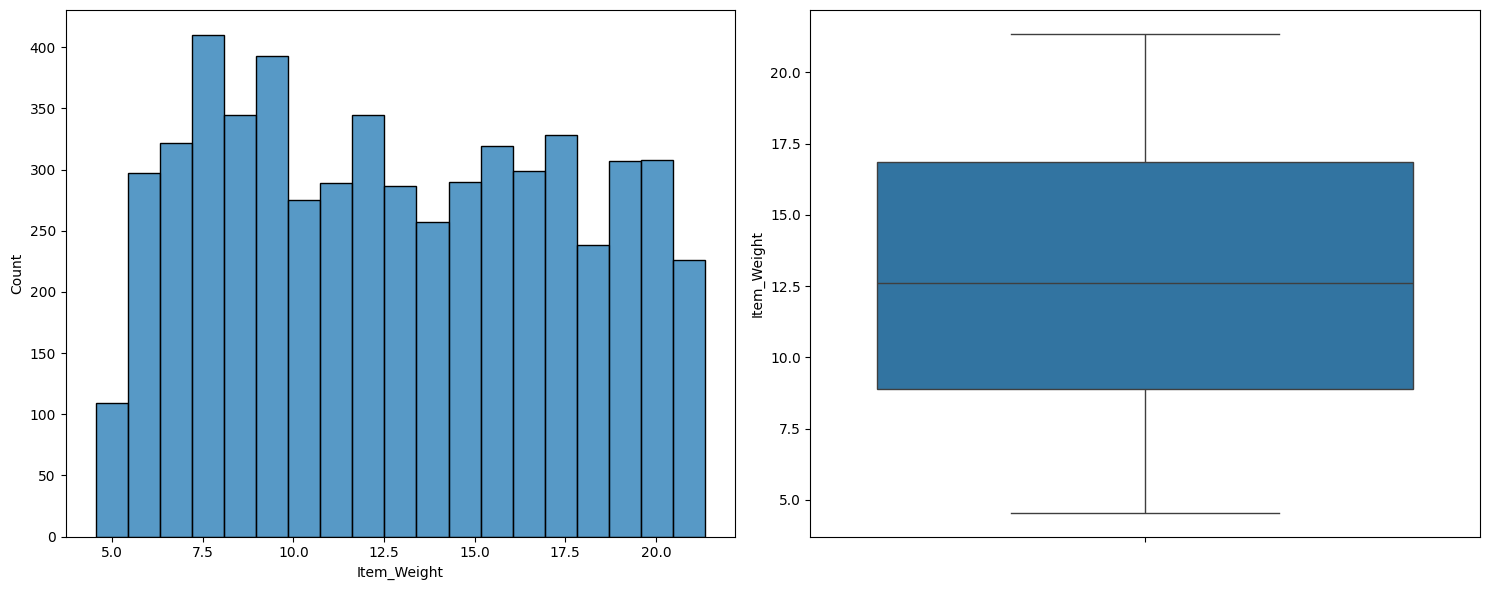

In [47]:
def plot_figs(data, column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    sns.histplot(data=data, x=column, ax=ax1)
    sns.boxplot(data=data, y=column, ax=ax2)
    plt.tight_layout()
    plt.show()

plot_figs(X_train_v, 'Item_Weight')

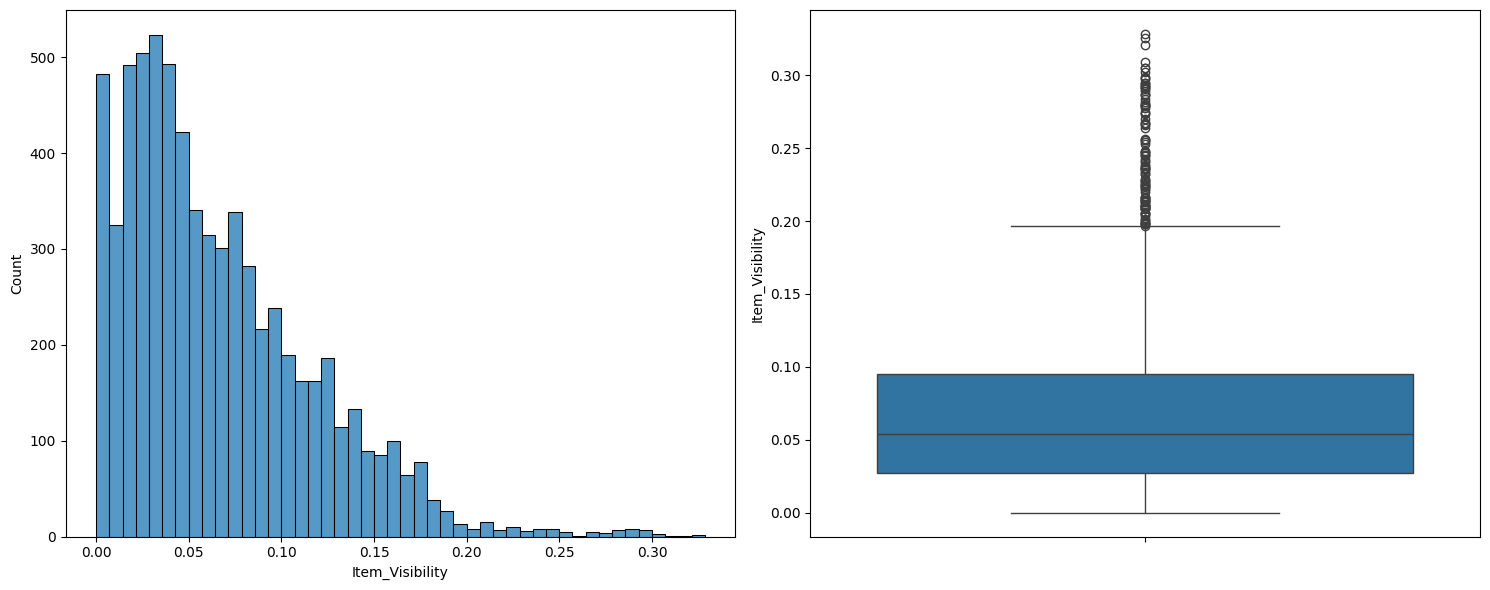

In [48]:

plot_figs(X_train_v, 'Item_Visibility')

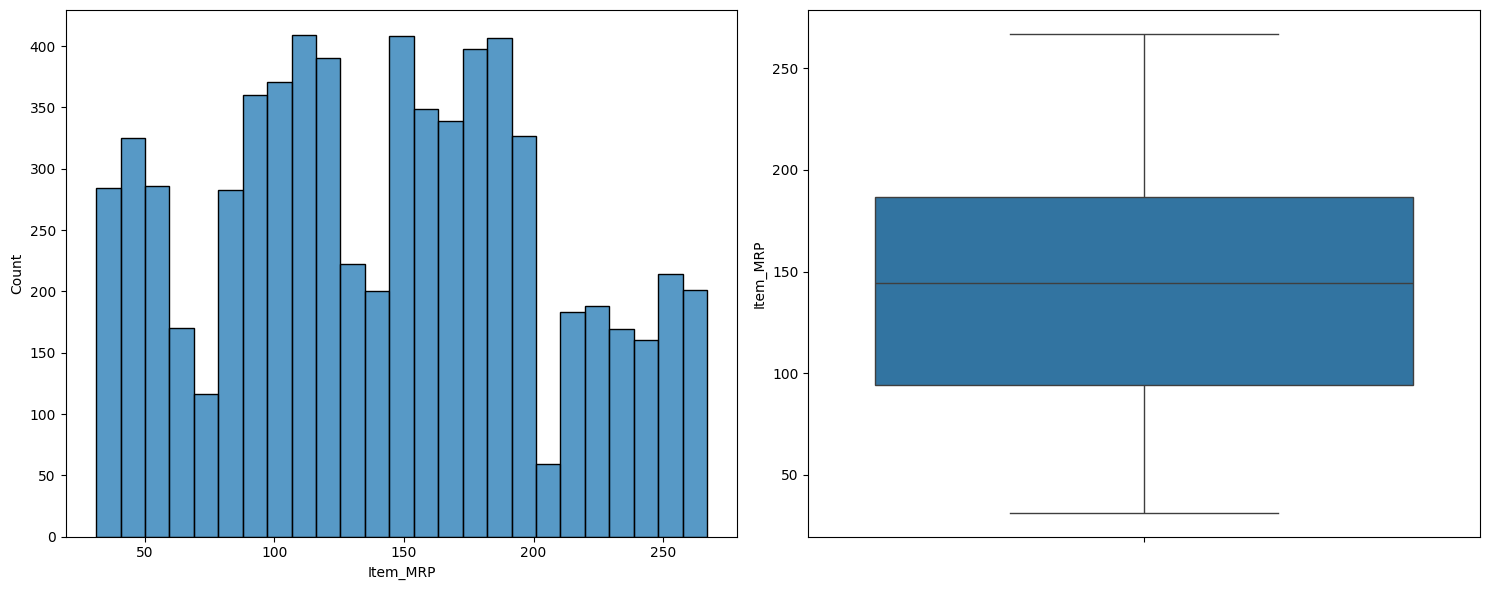

In [49]:
plot_figs(X_train_v, 'Item_MRP')


<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

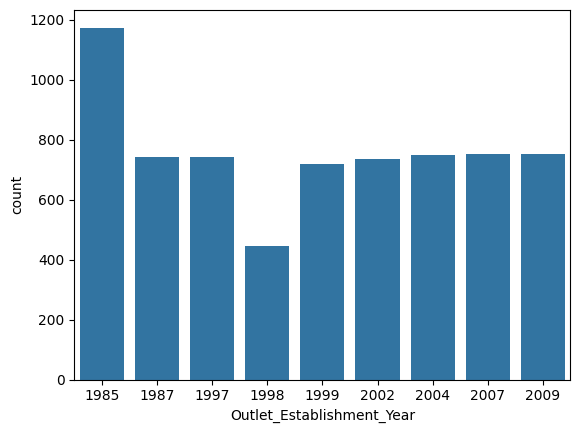

In [50]:
sns.countplot(data=X_train_v, x='Outlet_Establishment_Year')


In [20]:
categorical['Outlet_Size'].value_counts()


Outlet_Size
Medium    2233
Small     1906
High       744
Name: count, dtype: int64

In [22]:
categorical['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    4035
Regular    2336
LF          267
reg          93
low fat      87
Name: count, dtype: int64

In [21]:
categorical['Item_Type'].value_counts()


Item_Type
Fruits and Vegetables    1002
Snack Foods               971
Household                 744
Frozen Foods              681
Dairy                     536
Canned                    513
Baking Goods              509
Health and Hygiene        409
Soft Drinks               354
Meat                      325
Breads                    190
Hard Drinks               183
Others                    139
Starchy Foods             128
Breakfast                  86
Seafood                    48
Name: count, dtype: int64

In [23]:
categorical['Outlet_Size'].value_counts()


Outlet_Size
Medium    2233
Small     1906
High       744
Name: count, dtype: int64

In [24]:
categorical['Outlet_Location_Type'].value_counts()


Outlet_Location_Type
Tier 3    2703
Tier 2    2239
Tier 1    1876
Name: count, dtype: int64

In [25]:
categorical['Outlet_Type'].value_counts()


Outlet_Type
Supermarket Type1    4446
Grocery Store         859
Supermarket Type3     761
Supermarket Type2     752
Name: count, dtype: int64

In [51]:
X_train_v['Item_Identifier'].apply(lambda x: x[:2]).value_counts()



Item_Identifier
FD    4887
NC    1292
DR     639
Name: count, dtype: int64

In [27]:
def create_new_features(data):
    data['Item_Type_new'] = data['Item_Identifier'].apply(lambda x: x[:2])
    data['Item_Type_new'] = data['Item_Type_new'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})
    return data



In [52]:
X_train_v = create_new_features(X_train_v)
X_train_v.head()







,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_new
549,FDW44,9.500,Regular,0.035206,Fruits and Vegetables,171.3448,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food
7757,NCF54,18.000,Low Fat,0.047473,Household,170.5422,OUT045,2002,NaN,Tier 2,Supermarket Type1,Non-Consumable
764,FDY03,17.600,Regular,0.076122,Meat,111.7202,OUT046,1997,Small,Tier 1,Supermarket Type1,Food
6867,FDQ20,8.325,Low Fat,0.029845,Fruits and Vegetables,41.6138,OUT045,2002,NaN,Tier 2,Supermarket Type1,Food
2716,FDP34,12.850,Low Fat,0.137228,Snack Foods,155.5630,OUT046,1997,Small,Tier 1,Supermarket Type1,Food


In [53]:
X_train_v.isnull().sum()



Item_Identifier                 0
Item_Weight                  1174
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1935
Outlet_Location_Type            0
Outlet_Type                     0
Item_Type_new                   0
dtype: int64

In [59]:
X_train_v[['Item_Identifier','Item_Weight' ]].drop_duplicates().sort_values(by='Item_Identifier')


,Item_Identifier,Item_Weight
1245,DRA12,11.60
4416,DRA24,NaN
4900,DRA24,19.35
8371,DRA59,8.27
6057,DRA59,NaN
...,...,...
6056,NCZ42,10.50
6879,NCZ53,9.60
2084,NCZ53,NaN
1896,NCZ54,NaN


In [60]:
item_pivoted = X_train_v.pivot_table(values=['Item_Weight'],index=['Item_Identifier']).reset_index()
item_weight_mapping = dict(zip(item_pivoted['Item_Identifier'], item_pivoted['Item_Weight']))
list(item_weight_mapping.items())[:10]


[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.3),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [56]:
item_type_pivoted = X_train_v.pivot_table(index=['Item_Type_new'], values=['Item_Weight'], aggfunc='median').reset_index()
item_type_mapping = dict(zip(item_type_pivoted['Item_Type_new'], item_type_pivoted['Item_Weight']))
item_type_mapping.items()


dict_items([('Drinks', 11.6), ('Food', 12.65), ('Non-Consumable', 13.1)])

In [67]:
def compute_item_weight(data_frame):
    # Fill missing Item_Weight by Item_Identifier mapping
    data_frame['Item_Weight'] = data_frame['Item_Weight'].fillna(
        data_frame['Item_Identifier'].map(item_weight_mapping)
    )
    
    # Fill remaining missing Item_Weight by Item_Type_new mapping
    data_frame['Item_Weight'] = data_frame['Item_Weight'].fillna(
        data_frame['Item_Type_new'].map(item_type_mapping)
    )
    
    return data_frame


In [72]:
X_train_v = compute_item_weight(X_train_v)

# Confirm missing values removed
X_train_v.isnull().sum()




Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1935
Outlet_Location_Type            0
Outlet_Type                     0
Item_Type_new                   0
Item_weight                     0
dtype: int64